***BRAYAN GERSON DURAN TOCONAS***


In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load FashionMNIST dataset
fashion_mnist = datasets.fetch_openml(name="Fashion-MNIST", version=1, as_frame=False)

# Create a DataFrame for labels
labels = pd.DataFrame(fashion_mnist.target, columns=['label'])

# Create a DataFrame for features
features = pd.DataFrame(fashion_mnist.data, columns=[f'pixel_{i}' for i in range(fashion_mnist.data.shape[1])])

# Combine features and labels into one DataFrame
df = pd.concat([features, labels], axis=1)


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

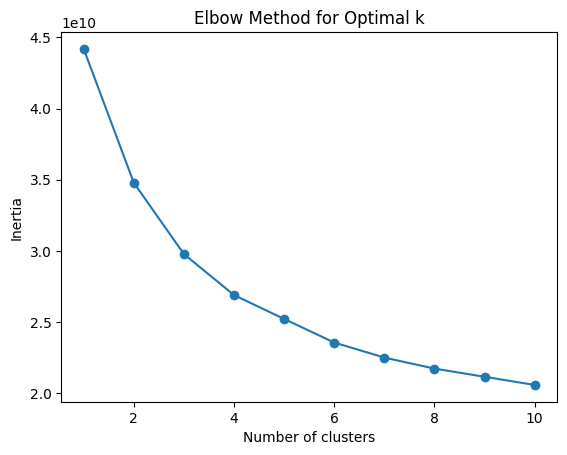

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

subset_size = 10000
subset_data = df.sample(n=subset_size, random_state=42)

X = subset_data.drop('label', axis=1)

inertias = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


**With 2 clusters**

In [14]:
import plotly.express as px

kmeans = KMeans(n_clusters=2, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(X)

# Visualize in 2D and 3D
fig_2d = px.scatter(subset_data, x='pixel_0', y='pixel_1', color='cluster')
fig_3d = px.scatter_3d(subset_data, x='pixel_0', y='pixel_1', z='pixel_2', color='cluster')

# Show plots
fig_2d.show()
fig_3d.show()


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, subset_data['label'], test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_real = clf.predict(X_test)

kmeans_labels = kmeans.predict(X_test)
y_pred_kmeans = clf.predict(X_test)

f1_real = f1_score(y_test, y_pred_real, average='weighted')
accuracy_real = accuracy_score(y_test, y_pred_real)

f1_kmeans = f1_score(y_test, y_pred_kmeans, average='weighted')
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)

print(f"F1 Score (Real Labels): {f1_real:.4f}, Accuracy (Real Labels): {accuracy_real:.4f}")
print(f"F1 Score (K-Means Labels): {f1_kmeans:.4f}, Accuracy (K-Means Labels): {accuracy_kmeans:.4f}")


F1 Score (Real Labels): 0.8553, Accuracy (Real Labels): 0.8570
F1 Score (K-Means Labels): 0.8553, Accuracy (K-Means Labels): 0.8570


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



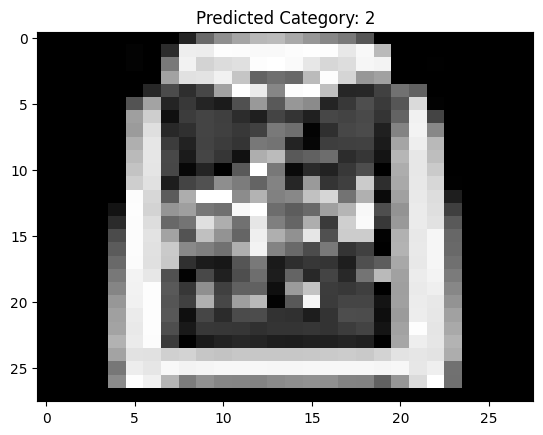

/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Real Category: 2


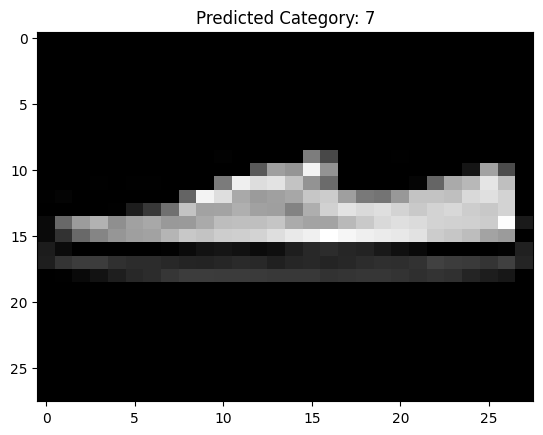

Real Category: 7


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



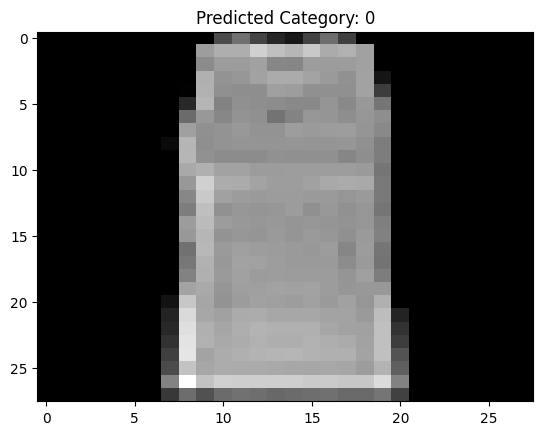

Real Category: 0


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



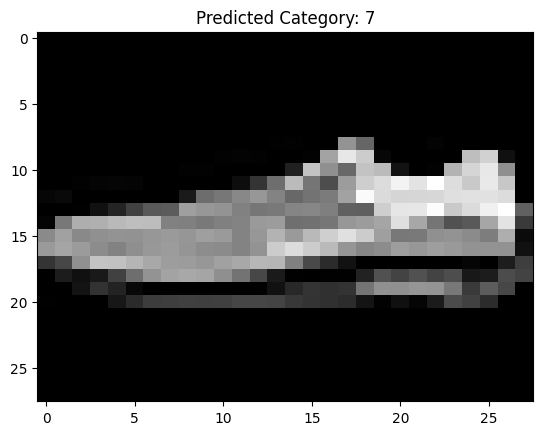

Real Category: 7


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



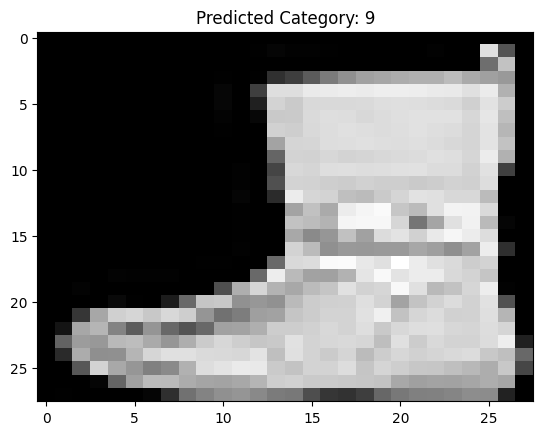

Real Category: 9


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def predict_category_with_plot(model, test_data, num_images=5):
    random_test_images = test_data.sample(num_images, random_state=42)
    for index, row in random_test_images.iterrows():
        random_image_features = row.drop('label')

        image_array = np.array(random_image_features, dtype=float).reshape(28, 28)

        predicted_label = model.predict([random_image_features])[0]

        plt.imshow(image_array, cmap='gray', interpolation='nearest', aspect='auto')
        plt.title(f"Predicted Category: {predicted_label}")
        plt.show()

        real_label = row['label']
        print(f"Real Category: {real_label}")
        print("="*30)

predict_category_with_plot(clf, df, num_images=5)


**Now with 8 clusters**

In [38]:
import plotly.express as px

kmeans = KMeans(n_clusters=8, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(X)

fig_2d = px.scatter(subset_data, x='pixel_0', y='pixel_1', color='cluster')
fig_3d = px.scatter_3d(subset_data, x='pixel_0', y='pixel_1', z='pixel_2', color='cluster')

fig_2d.show()
fig_3d.show()


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, subset_data['label'], test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_real = clf.predict(X_test)

kmeans_labels = kmeans.predict(X_test)
y_pred_kmeans = clf.predict(X_test)

f1_real = f1_score(y_test, y_pred_real, average='weighted')
accuracy_real = accuracy_score(y_test, y_pred_real)

f1_kmeans = f1_score(y_test, y_pred_kmeans, average='weighted')
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)

print(f"F1 Score (Real Labels): {f1_real:.4f}, Accuracy (Real Labels): {accuracy_real:.4f}")
print(f"F1 Score (K-Means Labels): {f1_kmeans:.4f}, Accuracy (K-Means Labels): {accuracy_kmeans:.4f}")


F1 Score (Real Labels): 0.8553, Accuracy (Real Labels): 0.8570
F1 Score (K-Means Labels): 0.8553, Accuracy (K-Means Labels): 0.8570


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



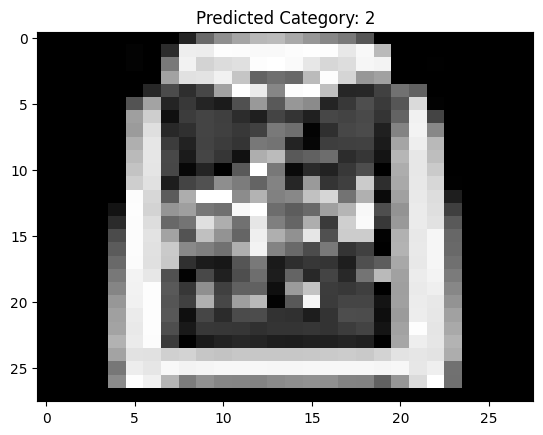

/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Real Category: 2


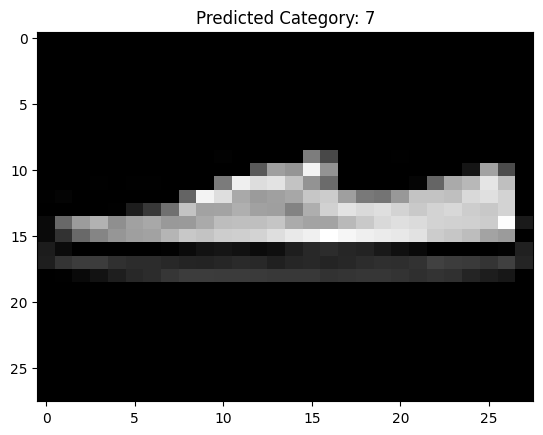

Real Category: 7


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



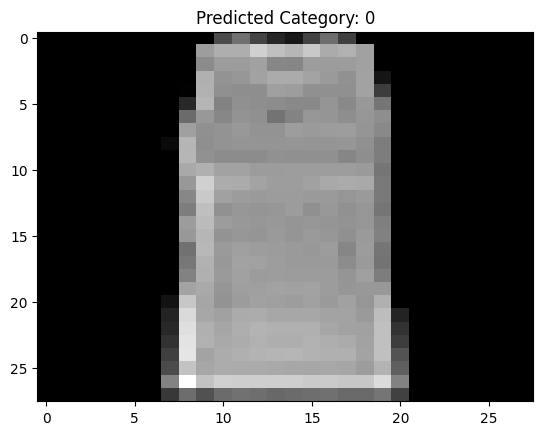

Real Category: 0


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



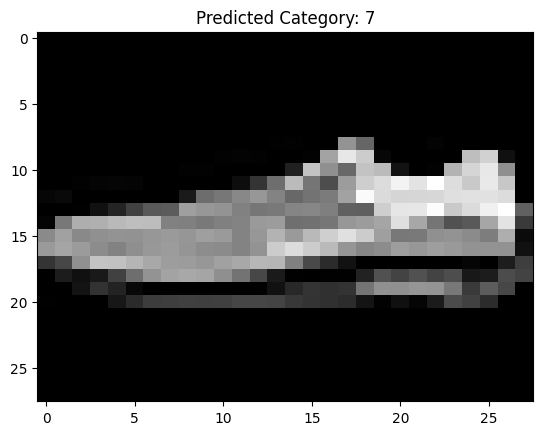

Real Category: 7


/home/hackbrian/anaconda3/envs/Vision/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



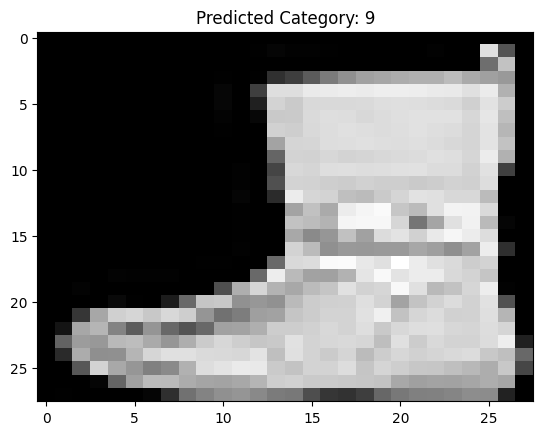

Real Category: 9


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def predict_category_with_plot(model, test_data, num_images=5):
    random_test_images = test_data.sample(num_images, random_state=42)
    for index, row in random_test_images.iterrows():
        random_image_features = row.drop('label')

        image_array = np.array(random_image_features, dtype=float).reshape(28, 28)

        predicted_label = model.predict([random_image_features])[0]

        plt.imshow(image_array, cmap='gray', interpolation='nearest', aspect='auto')
        plt.title(f"Predicted Category: {predicted_label}")
        plt.show()

        real_label = row['label']
        print(f"Real Category: {real_label}")
        print("="*30)

predict_category_with_plot(clf, df, num_images=5)
